### **Python code for analysis of Wallmart data globally**


1.   **Story telling about the Wallmart dataset**
2.   **Preprocessing**
      *   Checking for the presence of required columns
      *   Checking for Nullvalues
      *   Adding order Month as the new column
3. **Perform the below analysis on the Wallmart data by plotting a graph**

*   What is the total Sales that has happened for each product category globally
*   Analyse the profit obtained with respect to discounts given for different product category
*   What is the performance w.r.t Sales in every region
*   Analyse the sales behavior for the different customer segments
*   Analyse the global sales trend that is happening between 2012 to 2015 month-wise

Assignments
1. Add a new column Quarter in the original walmart dataset and fill the quarter values by extracting from Order Date feature
2. Display the date on which maximum shipping happened
3. Display the customers who gave sales more than $4000
4. list the Top 3 country giving maximum sales and also show the visualization of total sales for each country
5. Which product category and sub category is giving the minimum sales list and also show through visualization
6. Which region is giving minimum sales  
7. show the profit visualization only for those product categories that are given on discount
8. List those product categories and sub categories which are given on discount and not making profit  





   
   

Explanation of the Graphs
Sales Contribution by Category: A pie chart shows the percentage of sales each category contributes.

Profitability vs. Discounts: A scatter plot highlights the relationship between discounts and profit, categorized by product categories.

Regional Performance: A bar chart displays sales per region, aiding focus on underperforming regions.

Customer Segment Behavior: A bar chart identifies revenue contributions from each customer segment.

Trend Analysis: A line chart visualizes sales trends over time to detect seasonal peaks

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Excel file
path = '/content/drive/MyDrive/Vivarttana Technologies Internship /DA Session Docs/DA_Walmart Sales Analysis Docs/Walmart Global Superstore_Dataset.xlsx'

# Load the data (adjust the sheet name if needed)
df = pd.read_excel(path, index_col=0)
print(df.head(2))

# Inspect the data structure
print("Columns in the dataset:")
print(df.columns)




                        Order ID Order Date  Ship Date     Ship Mode  \
Row ID                                                                 
40098   CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
26341     IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   

         Customer ID  Customer Name    Segment  Postal Code           City  \
Row ID                                                                       
40098   AB-100151402  Aaron Bergman   Consumer      73120.0  Oklahoma City   
26341      JR-162107  Justin Ritter  Corporate          NaN     Wollongong   

                  State  ...   Product ID    Category Sub-Category  \
Row ID                   ...                                         
40098          Oklahoma  ...  TEC-PH-5816  Technology       Phones   
26341   New South Wales  ...  FUR-CH-5379   Furniture       Chairs   

                                     Product Name     Sales Quantity Discount  \
Row ID                              

In [ ]:
# Ensure relevant columns exist
required_columns = ['Category', 'Sales', 'Profit', 'Order Date']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is missing from the dataset.")

### **What is the total Sales that has happened for each product category globally**   

*Hypothesis : Technology Category has more sales*

Category
Technology         4744557
Furniture          4110451
Office Supplies    3787492
Name: Sales, dtype: int64


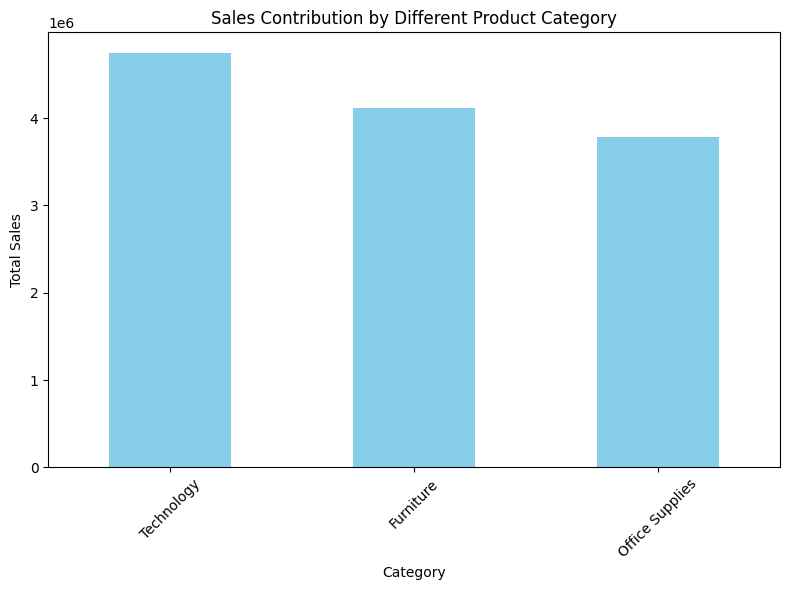

In [ ]:
# Sales Contribution by Category

category_sales=df.groupby('Category')['Sales'].sum().sort_values(ascending=False).astype(int)
print(category_sales)

plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Contribution by Different Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

yes, technology category as contribute more to the sale

---



**Analyse the profit obtained with respect to discounts given for different product category**


*Hypothesis :  Giving more discount increases profitability "

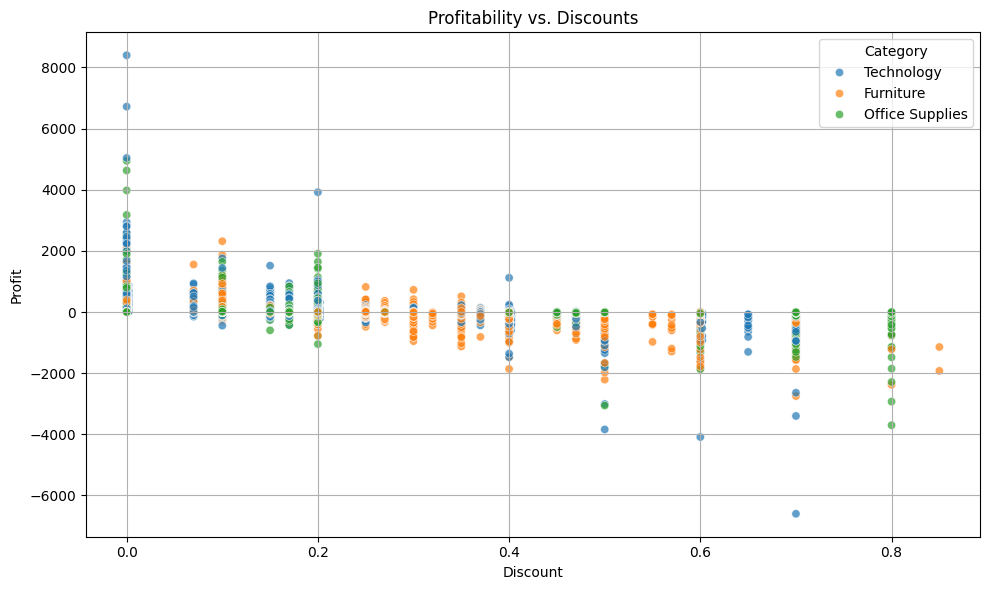

In [ ]:
# Profitability vs. Discounts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category',alpha=0.7)
plt.title('Profitability vs. Discounts')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

No, giving more discount decreases the profitabilty of business after a certain percentage , However upto 5-25% of discount given on product as a higher pofitabilty chances


---



### **What is the performance w.r.t Sales in every region**

*Hypothesis :  America as more sales*

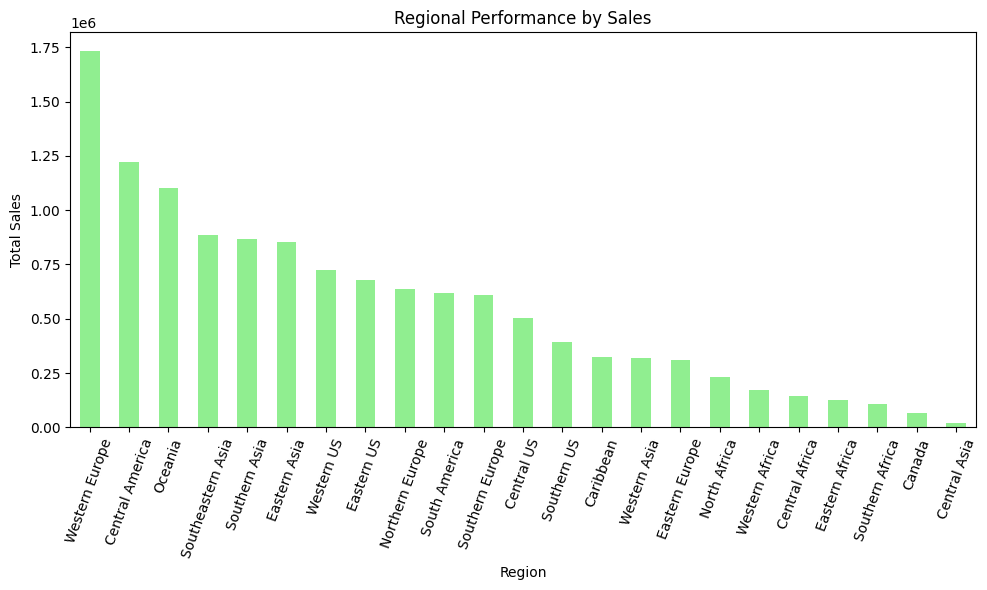

In [ ]:
# Regional Performance
region_Sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).astype(int)

plt.figure(figsize=(10, 6))
region_Sales.plot(kind='bar', color='lightgreen')
plt.title('Regional Performance by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

no , Western Europe has more contribution to sales

---



**Analyse the sales behavior for the different customer segments**

*hypothesis : Do corporate and home office segment contribute more to sales*

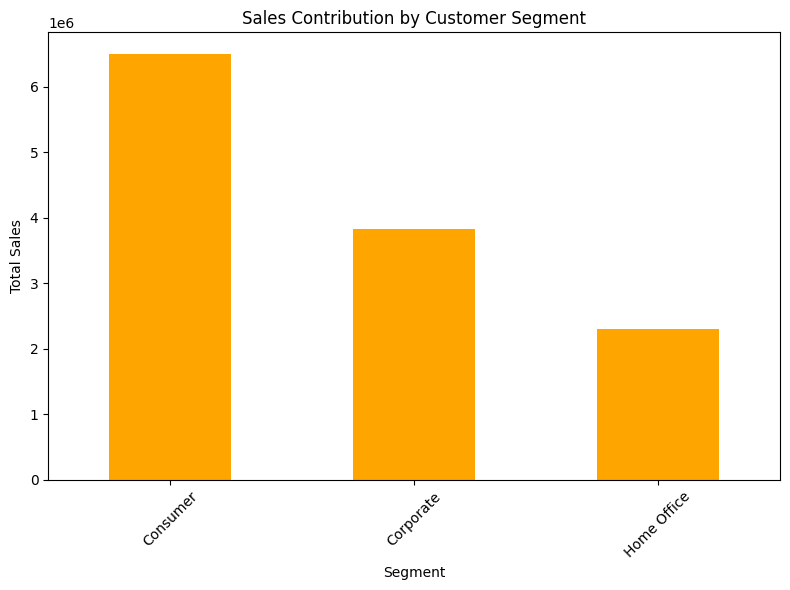

In [ ]:
# Customer Segment Behavior
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
segment_sales.plot(kind='bar', color='orange')
plt.title('Sales Contribution by Customer Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

no, consumer contribute more to sale

**Analyse the global sales trend that is happening between 2012 to 2015 month-wise**

                        Order ID Order Date  Ship Date       Ship Mode  \
Row ID                                                                   
40098   CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
26341     IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
25330     IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
13524    ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
47221    SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
...                          ...        ...        ...             ...   
29002    IN-2015-KE1642066-42174 2015-06-19 2015-06-19        Same Day   
34337   US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
31315   CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   
9596     MX-2013-RB1979518-41322 2013-02-17 2013-02-21  Standard Class   
6147     MX-2013-MC1810093-41416 2013-05-22 2013-05-26    Second Class   

         Customer ID       Customer N

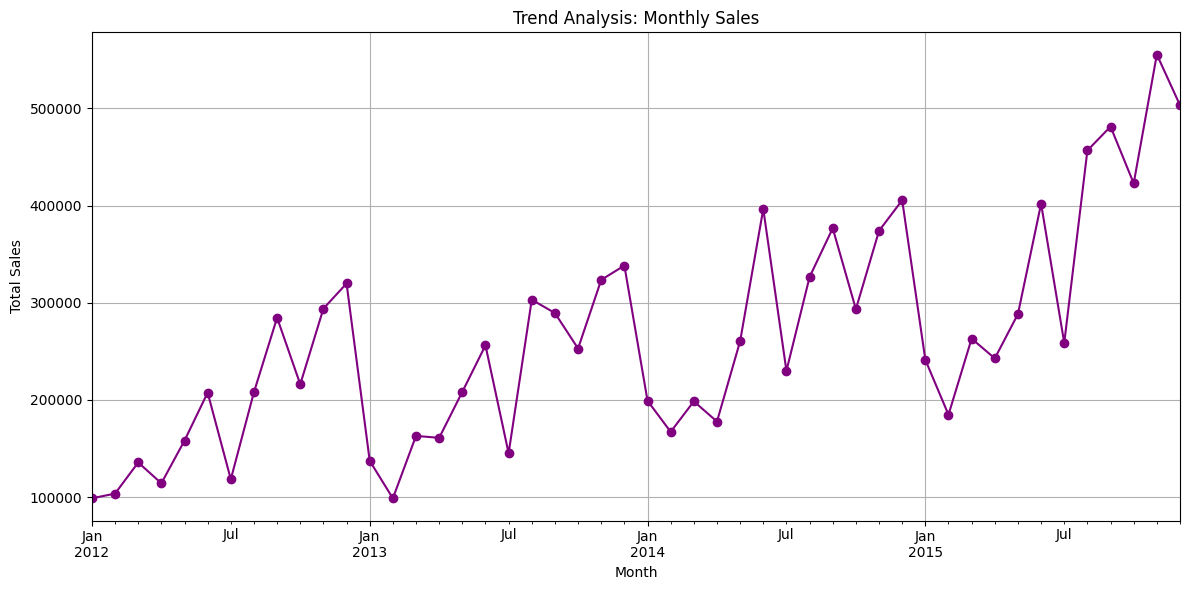

In [ ]:
# Trend Analysis (Monthly Sales)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
print(df)
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='purple', marker='o')
plt.title('Trend Analysis: Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Assignments**

1. Add a new column Quarter in the original walmart dataset and fill the quarter values by extracting from Order Date feature

In [ ]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the quarter and add to new column 'Quarter'
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# (Optional) Save the updated dataframe to a new Excel file
df.to_excel('Walmart_with_Quarter.xlsx', index=False)
print(df[['Order Date', 'Quarter']].head())

       Order Date Quarter
Row ID                   
40098  2014-11-11  2014Q4
26341  2014-02-05  2014Q1
25330  2014-10-17  2014Q4
13524  2014-01-28  2014Q1
47221  2014-11-05  2014Q4


2. Display the date on which maximum shipping happened

In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Count the number of shipments per date
ship_counts = df['Ship Date'].value_counts()

# Get the date with the maximum shipments
max_ship_date = ship_counts.idxmax()
max_ship_count = ship_counts.max()
print(f" Maximum shipping happened on: {max_ship_date.date()} with {max_ship_count} shipments")

 Maximum shipping happened on: 2015-11-22 with 130 shipments


3. Display the customers who gave sales more than $4000

In [ ]:
high_sales_customers = df[df['Sales'] > 4000]

print(high_sales_customers[['Customer ID', 'Customer Name', 'Sales']])



         Customer ID     Customer Name      Sales
Row ID                                           
25330      CR-127307      Craig Reiter   5175.171
31192     MB-1808592        Mick Brown   5244.840
28879      AJ-107801    Anthony Jacobs   4626.150
12069     PJ-1883564     Patrick Jones   7958.580
13528    LB-16795139    Laurel Beltran   5273.700
...              ...               ...        ...
38123   TC-209801402      Tamara Chand  17499.950
37637   TS-213701406      Todd Sumrall   5199.960
33920   TA-213851406      Tom Ashbrook  11199.968
37923   TB-214001406  Tom Boeckenhauer   6999.960
38540   TP-214151406      Tom Prescott   4416.174

[90 rows x 3 columns]


4. list the Top 3 country giving maximum sales and also show the visualization of total sales for each country


Top 3 Countries by Total Sales:

Country
United States    2297200
Australia         925235
France            858931
Name: Sales, dtype: int64


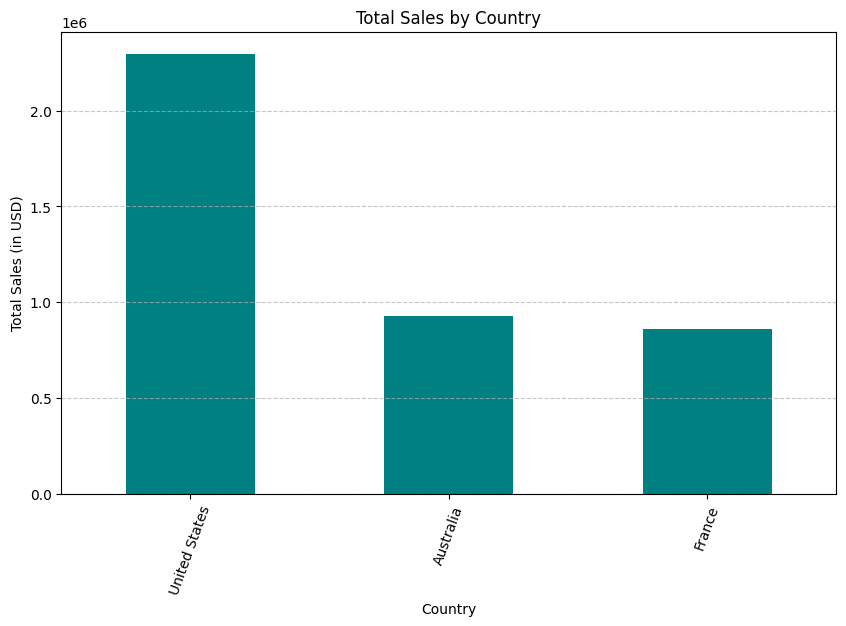

In [ ]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
country_sales = country_sales.astype(int)

# Display Top 3 countries with maximum sales
top_3_countries = country_sales.head(3)
print("Top 3 Countries by Total Sales:\n")
print(top_3_countries)
plt.figure(figsize=(10, 6))
top_3_countries.plot(kind='bar', color='teal')

# Format the chart
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales (in USD)")
plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--',alpha=0.7)

5. Which product category and sub category is giving the minimum sales list and also show through visualization


Minimum Sales:
Category        Office Supplies
Sub-Category             Labels
Sales                 73350.276
Name: 9, dtype: object


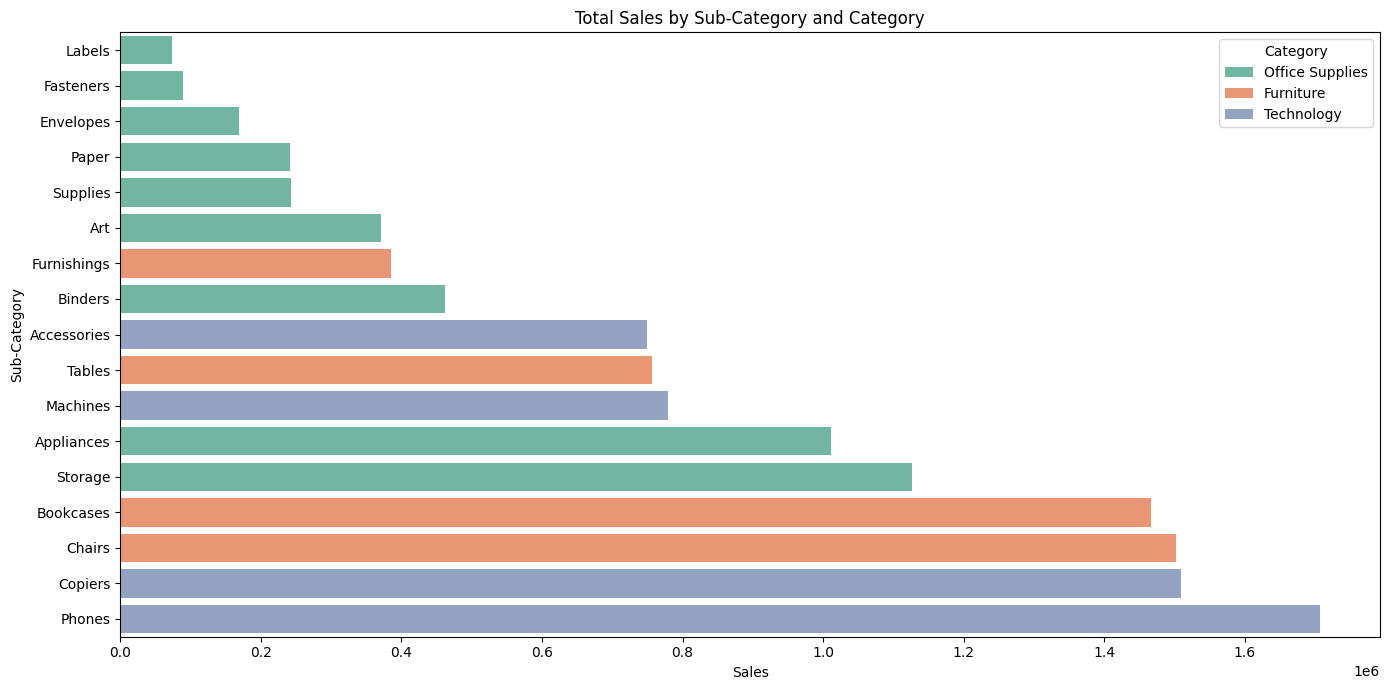

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Group by Category and Sub-Category and sum Sales
sales_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
# Find the row with the minimum sales
min_sales_row = sales_summary.loc[sales_summary['Sales'].idxmin()]
print("Minimum Sales:")
print(min_sales_row)
# Visualization
plt.figure(figsize=(14, 7))
sns.barplot(
    data=sales_summary.sort_values(by='Sales'),
    x='Sales', y='Sub-Category', hue='Category',
    dodge=False, palette='Set2'
)
plt.title('Total Sales by Sub-Category and Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

6. Which region is giving minimum sales


Region with minimum sales: Central Asia
Total Sales: 19311.46


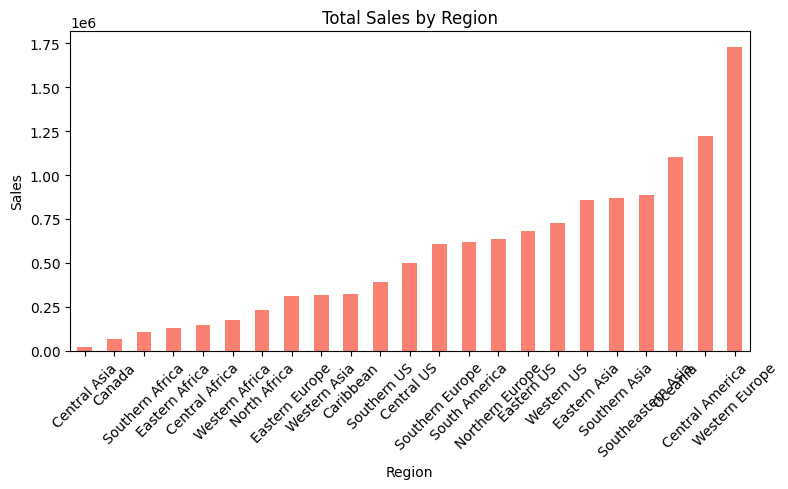

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Group by Region and sum the Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values()

# Display region with minimum sales
min_region = region_sales.idxmin()
min_sales = region_sales.min()
print(f"Region with minimum sales: {min_region}")
print(f"Total Sales: {min_sales:.2f}")
region_sales.plot(kind='bar', color='salmon', figsize=(8,5))
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7. show the profit visualization only for those product categories that are given on discount


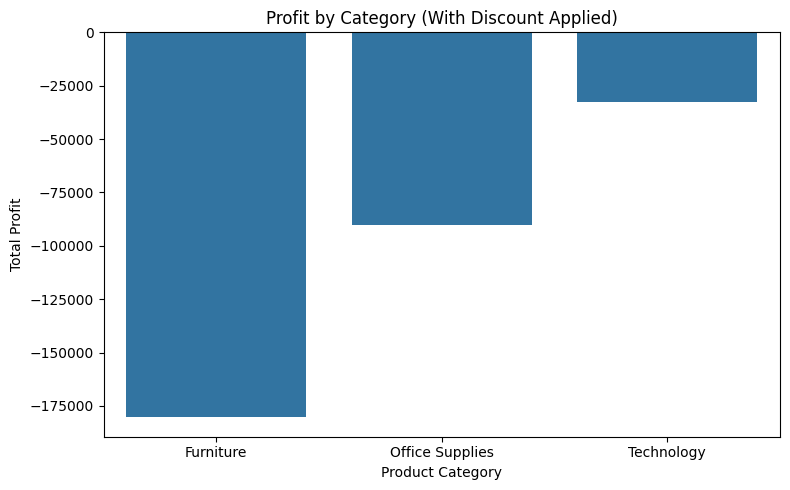

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Filter only discounted rows
discounted_df = df[df['Discount'] > 0]
# Group by Category and sum Profit
category_profit = discounted_df.groupby('Category')['Profit'].sum().reset_index()
# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=category_profit, x='Category', y='Profit')
plt.title('Profit by Category (With Discount Applied)')
plt.ylabel('Total Profit')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

8. List those product categories and sub categories which are given on discount and not making profit

Discounted products not making profit:
           Category Sub-Category  Profit
0         Furniture    Bookcases  -25901
1         Furniture       Chairs  -12082
2         Furniture  Furnishings  -17680
3         Furniture       Tables -124353
4   Office Supplies   Appliances  -10269
5   Office Supplies          Art  -15433
6   Office Supplies      Binders  -17136
7   Office Supplies    Envelopes   -6536
8   Office Supplies    Fasteners   -3807
9   Office Supplies       Labels   -1068
11  Office Supplies      Storage  -23026
12  Office Supplies     Supplies  -14148
13       Technology  Accessories  -19506
15       Technology     Machines  -47522
16       Technology       Phones  -23591


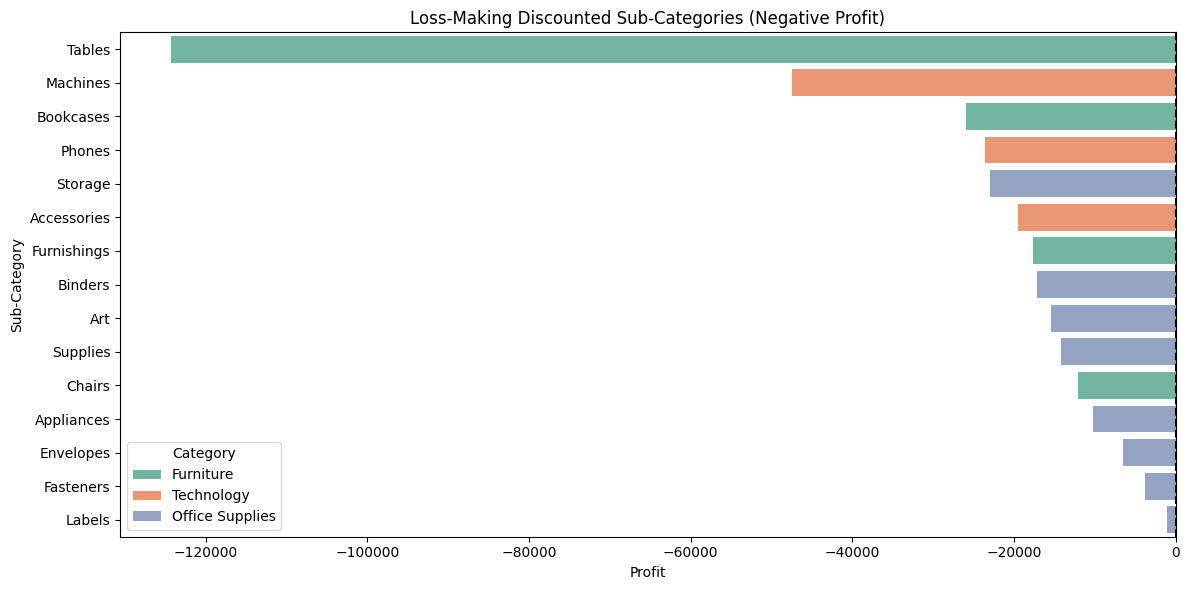

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Filter rows where Discount > 0
discounted = df[df['Discount'] > 0]
# Group by Category and Sub-Category, summing up Profit
grouped_profit = discounted.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
# Filter only those with negative profit
loss_making = grouped_profit[grouped_profit['Profit'] < 0]
# Display the result

print("Discounted products not making profit:")
print(loss_making)
df['Profit'] = df['Profit'].astype(int)

plt.figure(figsize=(12,6))
sns.barplot(data=loss_making.sort_values('Profit'), x='Profit', y='Sub-Category', hue='Category', dodge=False, palette='Set2')

plt.title('Loss-Making Discounted Sub-Categories (Negative Profit)')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()